In [1]:
import cometgp_sandbox as cgp
import pandas as pd
import george
import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook
from ipywidgets import interact

# Simulated Data

In [9]:
def simulated_data_comparison(gamma, period, amp):
    
    x_pos, py, gp1 = cgp.create_data(gamma, period, amp)
    
    def _do_work(n = 10, m = 0):
        x, y, yerr = cgp.sample_data(x_pos, py, 1, n, m)
    
        gp2, ln_likelihood = cgp.fit_data(x,y,yerr,gamma,period,gp1)
        
        gp3, ln_likelihood_opt, result = cgp.optimize(y, gp2, ln_likelihood, print_results = True)
        
        #ln_prior = cgp.log_prior(gamma, period, amp)
        #ln_post = cgp.log_post(ln_prior, ln_likelihood_opt)
        
        #print("Initial likelihood: " + str(ln_likelihood))
        #print("Optimized likelihood: " + str(ln_likelihood_opt))
        #print("Log prior: " + str(ln_prior))
        #print("Log post: " + str(ln_post))
        
        cgp.plotting(x,y,yerr,py,x_pos,gp2)
        #cgp.plotting(x,y,yerr,py,x_pos,gp3)

    return _do_work

#n will only work if m is set equal to 0

In [10]:
vary_nm = simulated_data_comparison(10,2,2)
interact(vary_nm, n=(0, 100,5), m = (0, 10), continuous_update=False)

interactive(children=(IntSlider(value=10, description=u'n', step=5), IntSlider(value=0, description=u'm', max=10), Output()), _dom_classes=('widget-interact',))

<function __main__._do_work>

# Imported Data
## Asteriod 1291

(<bound method GP.lnlikelihood of <george.gp.GP object at 0x7f19d7815490>>,       fun: 2.9496733950788894
 hess_inv: array([[  8.82504953e-02,  -2.15265839e-01,  -6.20422947e-08],
       [ -2.15265839e-01,   2.67210009e+00,   1.57261977e-06],
       [ -6.20422947e-08,   1.57261977e-06,   5.29259067e-09]])
      jac: array([  1.96132532e-09,  -1.23913768e-10,  -2.63750553e-06])
  message: 'Optimization terminated successfully.'
     nfev: 20
      nit: 14
     njev: 20
   status: 0
  success: True
        x: array([ -0.50551927,  22.38638318,  -1.45771271]), -2.9496733950788894)


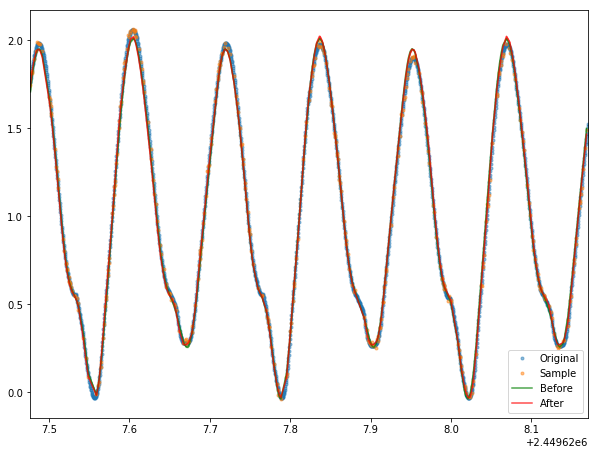

In [8]:
#import file into a pandas dataframe
df = pd.read_csv('1291_lc_49627_to_49787.txt', delimiter=' ',header=None, names=['x','y'], dtype={'x':float, 'y':float})
pre_x = df.x
pre_y = df.y
#sample only from the first 2000 points for x and y (out of 400,000ish...)
x, y, yerr = cgp.sample_data(pre_x[0:2000], pre_y[0:2000], 1 ,int(0.2*len(pre_x[0:2000])), 0)  

#plot the two original points
plt.figure(figsize=(10, 7.5))
plt.plot(pre_x[0:2000], pre_y[0:2000],  '.', alpha=0.5,label="Original")
plt.plot(x,y, '.', alpha=0.5, label="Sample")

#guess the kernel numbers 
kernel = 5*george.kernels.ExpSine2Kernel(gamma=5, log_period=-1.46) #optimal gamma was ~15
gp = george.GP(kernel)
gp.compute(x,yerr)
pred, pred_var = gp.predict(y, x, return_var=True)
#print(gp.lnlikelihood(y))

#plot the kernel-fitted guess
plt.fill_between(x, pred - np.sqrt(pred_var), pred + np.sqrt(pred_var), color="green", alpha=0.4)
plt.plot(x, pred, "green", lw=1.5, alpha=0.7, label="Before")

#optimize the fit
gp2, ln_like2, result = cgp.optimize(y,gp,gp.lnlikelihood, print_results=True)
#print(gp2.lnlikelihood(y))
pred, pred_var = gp.predict(y, x, return_var=True)

#print the optimized fit
plt.fill_between(x, pred - np.sqrt(pred_var), pred + np.sqrt(pred_var), color="red", alpha=0.4)
plt.plot(x, pred, "red", lw=1.5, alpha=0.7, label="After")
plt.xlim([pre_x[0], pre_x[2000]])
plt.legend()

## Asteriod 3200

-1801.57768445
(<bound method GP.lnlikelihood of <george.gp.GP object at 0x7f19d28c0ed0>>,       fun: -349.06556863943763
 hess_inv: array([[  5.60124650e-02,  -2.25598399e-01,  -7.15858951e-08],
       [ -2.25598399e-01,   5.04268759e+00,   1.87335872e-06],
       [ -7.15858951e-08,   1.87335872e-06,   4.54522792e-09]])
      jac: array([ -1.20211553e-07,  -4.10947223e-08,   2.77407467e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 87
      nit: 14
     njev: 73
   status: 2
  success: False
        x: array([ -0.9348712 ,  47.39893561,  -1.89625665]), 349.06556863943763)
349.065568639


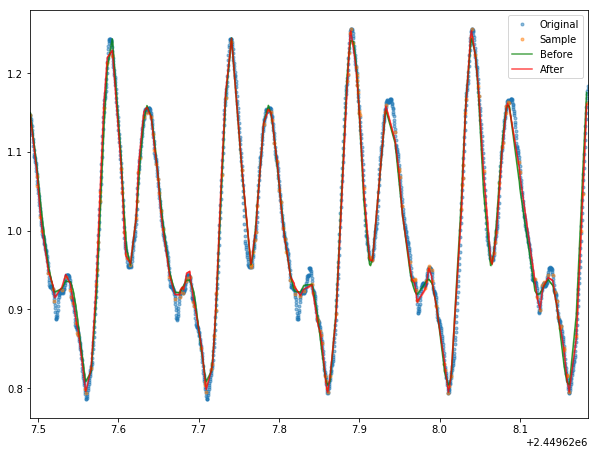

In [11]:
#import file into a pandas dataframe
df = pd.read_csv('3200_lc_49627_to_49787.txt', delimiter=' ',header=None, names=['x','y'], dtype={'x':float, 'y':float})
pre_x = df.x
pre_y = df.y
#sample only from the first 2000 points for x and y (out of 400,000ish...)
x, y, yerr = cgp.sample_data(pre_x[0:2000], pre_y[0:2000], 0.2, int(0.1*len(pre_x[0:2000])), 0)  

#plot the two original points
plt.figure(figsize=(10, 7.5))
plt.plot(pre_x[0:2000], pre_y[0:2000],  '.', alpha=0.5,label="Original")
plt.plot(x,y, '.', alpha=0.5, label="Sample")

#guess the kernel numbers 
kernel = 1*george.kernels.ExpSine2Kernel(gamma=1, log_period=-1.9) #optimal gamma was ~50
gp = george.GP(kernel)
gp.compute(x,yerr)
pred, pred_var = gp.predict(y, x, return_var=True)
print(gp.lnlikelihood(y))

#plot the kernel-fitted guess
plt.fill_between(x, pred - np.sqrt(pred_var), pred + np.sqrt(pred_var), color="green", alpha=0.4)
plt.plot(x, pred, "green", lw=1.5, alpha=0.7, label="Before")

#optimize the fit
gp2, ln_like2, result = cgp.optimize(y,gp,gp.lnlikelihood, print_results=True)

print(gp.lnlikelihood(y))
pred, pred_var = gp.predict(y, x, return_var=True)

#print the optimized fit
plt.fill_between(x, pred - np.sqrt(pred_var), pred + np.sqrt(pred_var), color="red", alpha=0.4)
plt.plot(x, pred, "red", lw=1.5, alpha=0.7, label="After")
plt.xlim([pre_x[0], pre_x[2000]])
plt.legend()

# Parameter Study

In [73]:
#import file into a pandas dataframe
df = pd.read_csv('3200_lc_49627_to_49787.txt', delimiter=' ',header=None, names=['x','y'], dtype={'x':float, 'y':float})
pre_x = df.x
pre_y = df.y
#sample only from the first 2000 points for x and y (out of 400,000ish...)
x, y, yerr = cgp.sample_data(pre_x[0:2000], pre_y[0:2000], 0.2, int(0.1*len(pre_x[0:2000])), 0)  

In [79]:
def fun_generator(parameter):
    #guess the kernel numbers 
    kernel = 1*george.kernels.ExpSine2Kernel(gamma=1, log_period=parameter) #optimal gamma was ~15
    gp = george.GP(kernel)
    gp.compute(x,yerr)
    pred, pred_var = gp.predict(y, x, return_var=True)

    #optimize the fit
    gp2, ln_like2, fun = cgp.optimize(y,gp,gp.lnlikelihood, print_results=True)
    return fun

In [83]:
periods = np.zeros((12,2))

for i in np.arange(12):
    print(i)
    periods[i][0] = 2*(i+1)
    periods[i][1] = np.log(2.0*(i+1)/24)

fun_values = np.zeros((12,3))

for i in np.arange(len(periods)):
    fun_values[i][0] = periods[i][0]
    fun_values[i][1] = periods[i][1]
    print(periods[i][1])
    fun_values[i][2] = fun_generator(periods[i][1])
    print(periods[i][0])
    
print(fun_values)

-2.48490664979


LinAlgError: 37-th leading minor of the array is not positive definite

-2135.28736926
(<bound method GP.lnlikelihood of <george.gp.GP object at 0x7fdd5ba17650>>,       fun: -217.3140460180506
 hess_inv: array([[  5.46667035e-02,  -3.17785539e-01,  -1.40673170e-07],
       [ -3.17785539e-01,   1.30228964e+01,   7.57363932e-06],
       [ -1.40673170e-07,   7.57363932e-06,   4.46923499e-09]])
      jac: array([ -5.43440009e-04,  -5.29610835e-05,   8.13207338e-01])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 102
      nit: 22
     njev: 90
   status: 2
  success: False
        x: array([ -0.95055648,  51.38084085,  -1.89603614]), 217.31404601805059)
217.314046018


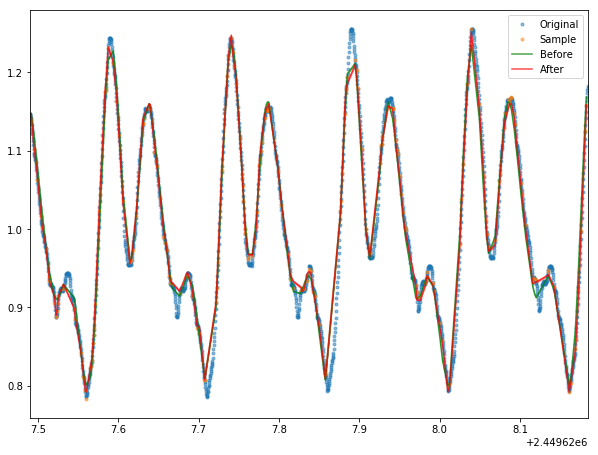

In [20]:
gp.parameter_vector
gp.parameter_names
gp.get_parameter_vector()
gp.set_parameter_vector

('mean:value',
 'white_noise:value',
 'kernel:k1:log_constant',
 'kernel:k2:gamma',
 'kernel:k2:log_period')

## To Do

add more data and sample more sparsely 
test sampling with m parameter
make yerr an input (1%)
look at emcee documentation
make parameter graphs

definition - gamma: length scale of variation

### parameter graphs

* amp, gamma, period = 5-10 each
* P = (1-24 hrs)
* 3 separate plots of parameter vs fun output (get from looping)


### cadence 
1 pt every 10 minutes of 8 hrs per night

2/4 nights per month (consecutive for 6/2 months)